In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [3]:
cpu_df = pd.read_csv('../results/matrix-numa.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_0_norm'] = cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_1_norm'] = cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed,insns_0_norm,insns_1_norm
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,0.095378,1.325407,0.146275,0.145540,0.145161,0.071332,0.127077,110.913761,10.985933,5.401835
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,0.082494,1.168169,0.144090,0.142410,0.136150,0.066108,0.122190,114.068387,10.103226,6.045806
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,0.081686,1.168610,0.142952,0.133020,0.133020,0.065680,0.118668,115.636129,10.104516,6.018710
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,0.082869,1.168906,0.140770,0.133020,0.134585,0.063811,0.118047,115.077771,10.150356,6.072586
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,0.102554,1.342222,0.140815,0.140845,0.133020,0.064334,0.119754,113.204789,11.824827,5.908633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,29.744970,22.591855,0.025935,0.131054,0.128940,0.126062,0.102998,201.801418,181.335268,6.800774
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,29.586119,22.480668,0.024681,0.128205,0.128940,0.126062,0.101972,200.195764,179.838254,6.772786
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,29.797785,22.601882,0.024927,0.129630,0.128940,0.128205,0.102925,199.099048,178.935873,6.714921
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,29.484530,22.373209,0.024421,0.128205,0.130372,0.129630,0.103157,199.432241,179.053308,6.808606


In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.379546
insns_0               0.362891
cache_hit_0           0.350475
cache_miss_0          0.397269
br_insns_0            0.207099
br_miss_0             0.084071
bus_cycles_0          0.379859
freq_0                0.131316
cpu_cycles_1          0.477603
insns_1               0.474445
cache_hit_1           0.469217
cache_miss_1          0.527512
br_insns_1            0.320919
br_miss_1             0.165341
bus_cycles_1          0.478266
freq_1                0.131316
cpu_cycles_2          0.360475
insns_2               0.354235
cache_hit_2           0.349350
cache_miss_2          0.386839
br_insns_2            0.254643
br_miss_2             0.135926
bus_cycles_2          0.361188
freq_2                0.131316
cpu_cycles_3          0.257701
insns_3               0.266003
cache_hit_3           0.279737
cache_miss_3          0.229825
br_insns_3            0.255929
br_miss_3             0.262884
bus_cycles_3          0.259226
freq_3  

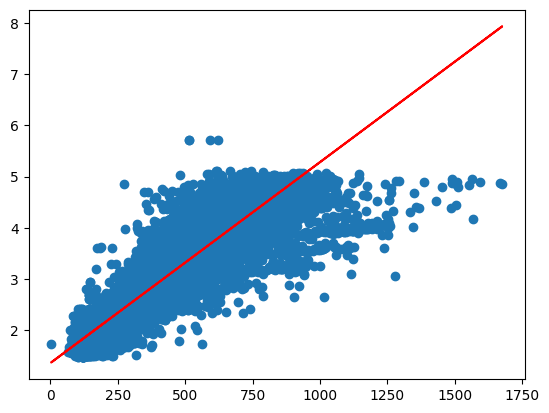

In [5]:
cpu_linear = LinearRegression()
cpu_linear.fit(cpu_df['clock_speed'].values.reshape(-1, 1),
               cpu_df['current'].values.reshape(-1, 1))

plt.scatter(cpu_df['clock_speed'].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))
plt.plot(cpu_df['clock_speed'].values.reshape(-1, 1),
         cpu_linear.predict(cpu_df['clock_speed'].values.reshape(-1, 1)),
         color='red')

In [6]:
#filtering out outliers to better see patterns in cpu_cycles

# calculate IQR for column A
Q1 = cpu_df['clock_speed'].quantile(0.25)
Q3 = cpu_df['clock_speed'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = cpu_df[(cpu_df['clock_speed'] < Q1 - threshold * IQR) | (cpu_df['clock_speed'] > Q3 + threshold * IQR)]

In [7]:
filtered_cpu = cpu_df.drop(outliers.index)

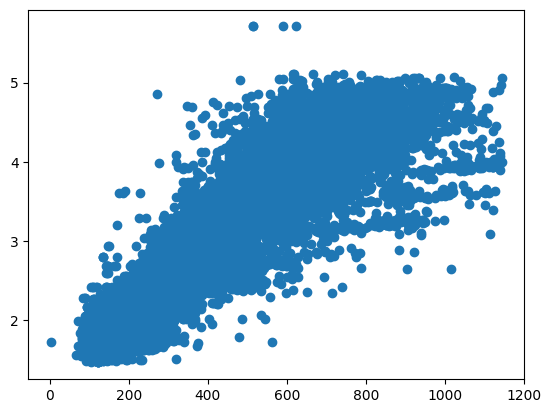

In [8]:
plt.scatter(filtered_cpu["clock_speed"].values.reshape(-1, 1),
            filtered_cpu['current'].values.reshape(-1, 1))

<Axes: xlabel='time'>

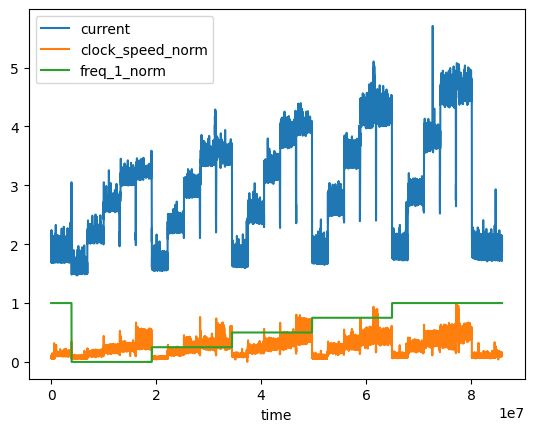

In [43]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [10]:
from sklearn.model_selection import train_test_split

df_X = cpu_df.drop(columns=['current', 'time'])
df_Y = cpu_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, random_state=42, test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dev, y_dev)
rf.score(X_test, y_test)

0.9252882466377814

In [12]:
feature_names = df_X.columns
feature_imps = zip(feature_names, rf.feature_importances_)
feature_imps = sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('cpu_cycles_1', 0.6923701984825767),
 ('bus_cycles_0', 0.05523584846472832),
 ('bus_cycles_2', 0.054956656521834464),
 ('cpu_cycles_0', 0.03133829264790254),
 ('cpu_cycles_3', 0.03035629072385114),
 ('clock_speed', 0.014383996931362808),
 ('clock_speed_norm', 0.012908175401605845),
 ('bus_cycles_1', 0.009217138015019617),
 ('cache_miss_2', 0.0059937163033252335),
 ('cache_hit_rate_avg', 0.005752201299703807),
 ('freq_1', 0.005104919426929672),
 ('freq_3', 0.0044581602322561805),
 ('freq_2', 0.004007305433697092),
 ('freq_0', 0.0039223759949516095),
 ('cache_miss_0', 0.003867700713674041),
 ('br_miss_rate_avg', 0.0036763234845420623),
 ('insns_2', 0.003652775764623073),
 ('br_miss_rate_3', 0.0033321781721686664),
 ('br_insns_2', 0.003257366507838882),
 ('cpu_cycles_2', 0.003068652048985963),
 ('insns_1_norm', 0.0029075482717501842),
 ('br_miss_rate_0', 0.0029005345873619258),
 ('br_miss_rate_2', 0.0027274869571907666),
 ('bus_cycles_3', 0.002689801889357241),
 ('cache_hit_rate_0', 0.0

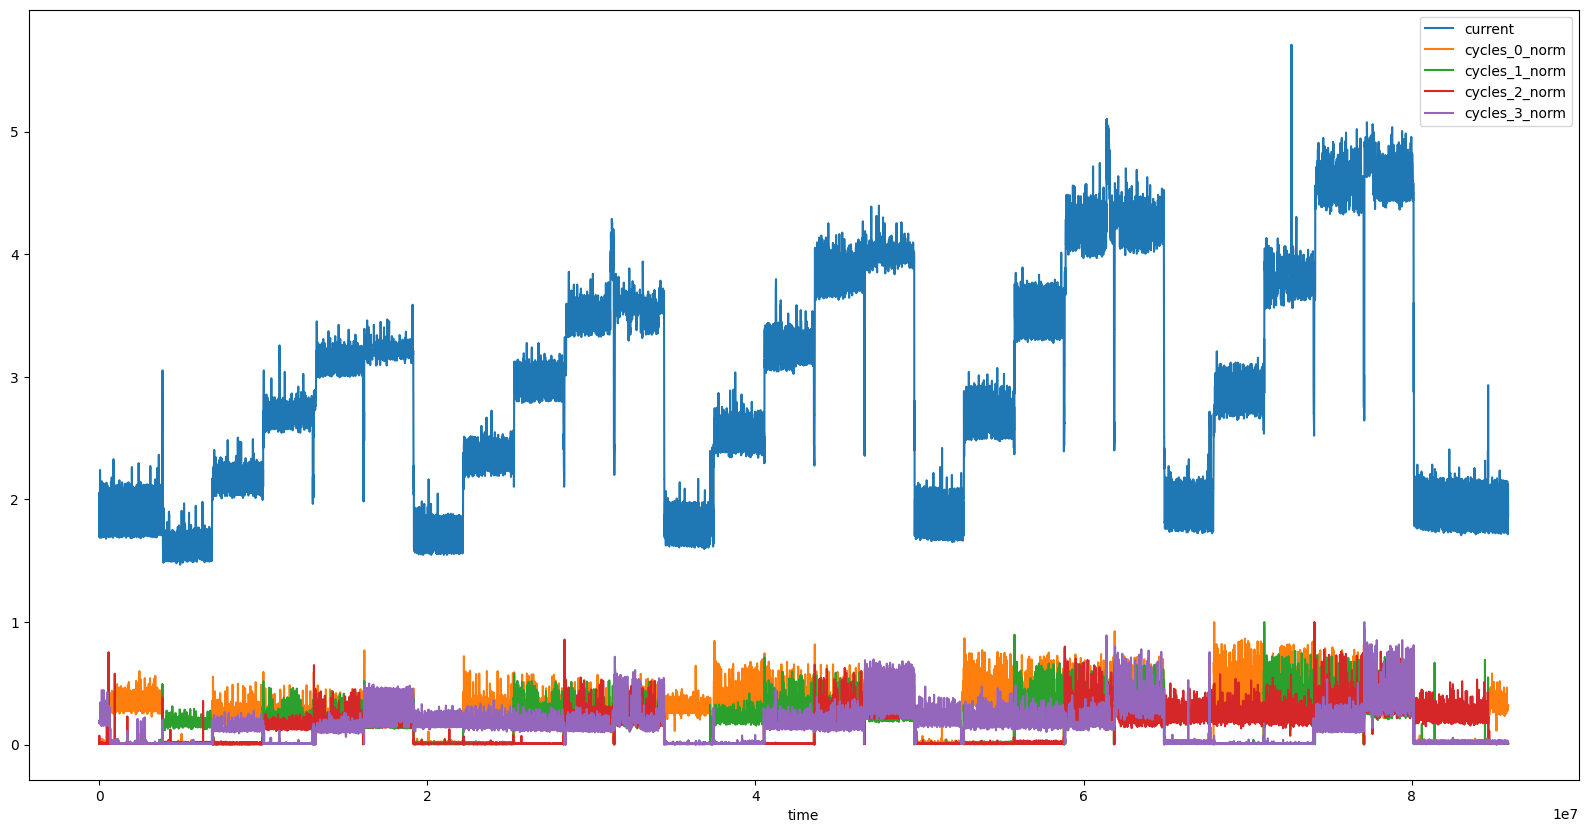

In [50]:
cpu_df['cycles_0_norm'] = min_max_scaling(cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_1_norm'] = min_max_scaling(cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_2_norm'] = min_max_scaling(cpu_df['insns_2'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_3_norm'] = min_max_scaling(cpu_df['insns_3'] / (cpu_df['time'] - cpu_df['time'].shift()))

ax = cpu_df.plot(x='time', y=['current', 'cycles_0_norm', 'cycles_1_norm', 'cycles_2_norm', 'cycles_3_norm'], figsize=(20, 10))

In [14]:
mem_df = pd.read_csv('../results/mem-numa.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,3368,1.932,41019,18872,6885,48,1889,310,11902,700000,...,0.062347,2.179797,2.167668,1.350710,0.164108,0.033074,0.143317,0.147335,0.121959,133.713043
2,5342,1.932,39038,18351,6845,43,1863,275,11108,700000,...,0.065335,2.132188,2.130978,1.330555,0.147611,0.032533,0.131455,0.137931,0.112383,136.435157
3,7328,1.932,38960,18251,6798,45,1849,282,11128,700000,...,0.064819,2.116490,2.144124,1.329703,0.152515,0.033623,0.136150,0.133550,0.113960,134.765358
4,9327,1.572,78764,29040,11831,303,2962,799,31031,700000,...,0.119092,2.066667,3.688750,1.712225,0.269750,0.038197,0.182655,0.144201,0.158701,142.602301
5,11312,1.572,97525,38172,15495,607,4349,993,40257,700000,...,0.164119,4.834114,4.831928,2.697747,0.228328,0.032410,0.134585,0.141066,0.134097,145.203023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,17055362,1.844,31331,14643,5302,37,1283,159,6558,700000,...,1.500142,1.499858,0.069943,1.015741,0.123928,0.132479,0.126781,0.060847,0.111009,93.914157
8259,17057355,1.844,31177,14643,5305,38,1288,160,6482,700000,...,1.500994,1.500284,0.071075,1.016297,0.124224,0.128023,0.126781,0.060612,0.109910,92.601104
8260,17059612,1.696,31408,15332,5353,42,1314,164,6669,700000,...,1.514205,1.391077,0.070040,0.991869,0.124810,0.133903,0.128713,0.064885,0.113078,84.078866
8261,17061599,1.696,31215,14642,5308,37,1287,158,6489,700000,...,1.502273,1.497734,0.071525,1.016140,0.122766,0.129630,0.127479,0.063981,0.110964,92.672874


In [15]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.823642
insns_0               0.749878
cache_hit_0           0.801461
cache_miss_0          0.403932
br_insns_0            0.651427
br_miss_0             0.300938
bus_cycles_0          0.824206
freq_0                     NaN
cpu_cycles_1          0.346640
insns_1               0.262256
cache_hit_1           0.259576
cache_miss_1          0.234749
br_insns_1            0.274593
br_miss_1             0.226178
bus_cycles_1          0.344501
freq_1                     NaN
cpu_cycles_2          0.296548
insns_2               0.279805
cache_hit_2           0.284544
cache_miss_2          0.274753
br_insns_2            0.286349
br_miss_2             0.242668
bus_cycles_2          0.292220
freq_2                     NaN
cpu_cycles_3         -0.237007
insns_3              -0.258257
cache_hit_3          -0.259616
cache_miss_3         -0.280516
br_insns_3           -0.278630
br_miss_3            -0.246036
bus_cycles_3         -0.248301
freq_3  

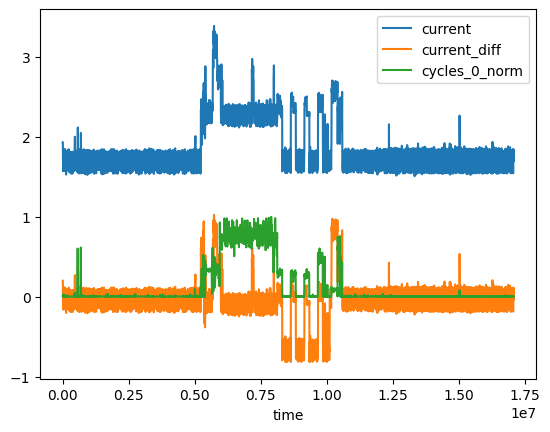

In [35]:
mem_df['clock_speed_norm'] = min_max_scaling(mem_df['clock_speed'])
mem_df['cycles_0_norm'] = min_max_scaling(mem_df['insns_0'] / (mem_df['time'] - mem_df['time'].shift()))
mem_df['current_diff'] = np.where((mem_df['time'] > 5350000) & (mem_df['time'] < 10100000),
                                   mem_df['current'] - 2.3588663400979706,
                                   mem_df['current'] - 1.7275771905424202)

ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cycles_0_norm'])

(5000000.0, 11000000.0)

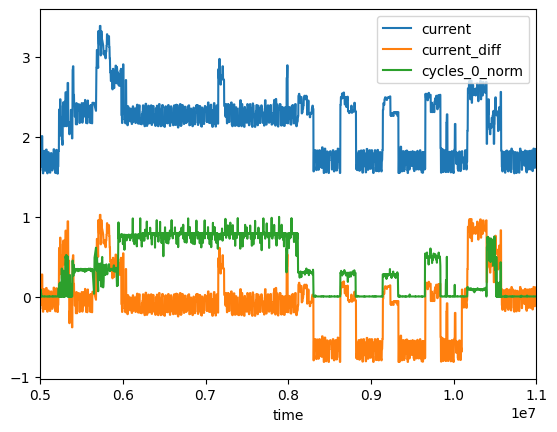

In [36]:
ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cycles_0_norm'])
ax.set_xlim(5000000, 11000000)

In [18]:
from sklearn.model_selection import train_test_split

mem_df_X = mem_df.drop(columns=['current'])
mem_df_Y = mem_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(mem_df_X, mem_df_Y, random_state=42, test_size=0.2)


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_mem = RandomForestRegressor(random_state=42)
rf_mem.fit(X_dev, y_dev)
rf_mem.score(X_test, y_test)

0.9839831238031287

In [20]:
feature_names = mem_df_X.columns
feature_imps = zip(feature_names, rf_mem.feature_importances_)
feature_imps=sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('insns_0', 0.3817684390777415),
 ('cycles_0_norm', 0.13807714341704416),
 ('bus_cycles_0', 0.13726136731247024),
 ('cpu_cycles_0', 0.13725332016203293),
 ('cache_hit_0', 0.08302119730892252),
 ('current_diff', 0.04487849286342264),
 ('cache_hit_rate_avg', 0.028230562279008768),
 ('cache_hit_rate_3', 0.00984440351188608),
 ('br_miss_rate_0', 0.007072535499259138),
 ('cpu_cycles_2', 0.006811804545242424),
 ('bus_cycles_2', 0.005311696382269714),
 ('time', 0.004734887235297176),
 ('br_miss_rate_1', 0.002994404528754079),
 ('cache_hit_rate_0', 0.0016246470081536918),
 ('br_insns_0', 0.0013322869095524544),
 ('br_miss_0', 0.0012765697220263616),
 ('cache_miss_2', 0.0011512243782272262),
 ('br_miss_rate_2', 0.001002513297517515),
 ('cache_hit_rate_2', 0.0007312906632041342),
 ('br_miss_rate_avg', 0.0005562166874623555),
 ('cpu_cycles_3', 0.0004971353027829114),
 ('insns_2', 0.0004941068761643133),
 ('bus_cycles_3', 0.00041876732463731205),
 ('cache_hit_rate_1', 0.00041840719135750144),
 ('